# Image_Processing_of_X-rays of COVID and NORMAL Dataset

## **Image Segmentation by K-means Clustering Algorithm** 

In [88]:
import numpy as np
from sklearn.cluster import KMeans
import cv2
from matplotlib import pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from math import log10, sqrt

In [89]:
image1=cv2.imread("img001.jpg")
image2=cv2.imread("img002.jpg")
image3=cv2.imread("img003.jpg")
image=[image1,image2,image3]
reshaped=[0,0,0]
for i in range(0,3):
    reshaped[i] = image[i].reshape(image[i].shape[0] * image[i].shape[1], image[i].shape[2])

In [90]:
numClusters=list(map(int,input("Enter the number of culsters for image 1,2 and 3 respectively: ").split(" ")))

In [91]:
clustering=[0,0,0]
for i in range(0,3):
    kmeans = KMeans(n_clusters=numClusters[i], n_init=40, max_iter=500).fit(reshaped[i])
    clustering[i] = np.reshape(np.array(kmeans.labels_, dtype=np.uint8),
    (image[i].shape[0], image[i].shape[1]))

In [92]:
sortedLabels=[[],[],[]]
for i in range(0,3):
    sortedLabels[i] = sorted([n for n in range(numClusters[i])],
        key=lambda x: -np.sum(clustering[i] == x))

In [93]:
kmeansImage=[0,0,0]
concatImage=[[],[],[]]
for j in range(0,3):
    kmeansImage[j] = np.zeros(image[j].shape[:2], dtype=np.uint8)
    for i, label in enumerate(sortedLabels[j]):
        kmeansImage[j][ clustering[j] == label ] = int((255) / (numClusters[j] - 1)) * i
    concatImage[j] = np.concatenate((image[j],193 * np.ones((image[j].shape[0], int(0.0625 * image[j].shape[1]), 3), dtype=np.uint8),cv2.cvtColor(kmeansImage[j], cv2.COLOR_GRAY2BGR)), axis=1)

AxesImage(54,36;334.8x217.44)


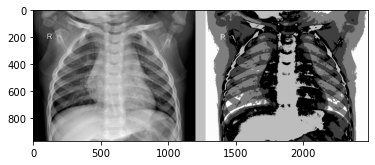

In [94]:
print(plt.imshow(concatImage[0]))

AxesImage(54,36;334.8x217.44)


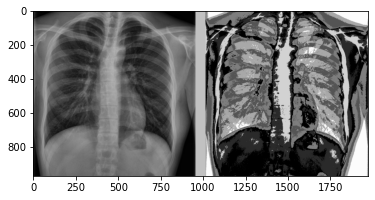

In [95]:
print(plt.imshow(concatImage[1]))

AxesImage(54,36;334.8x217.44)


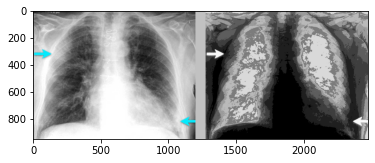

In [96]:
print(plt.imshow(concatImage[2]))

In [97]:
#PSNR
def PSNR(original, segmented):
	mse = np.mean((original - segmented) ** 2)
	if(mse == 0): # MSE is zero means no noise is present in the signal .
				# Therefore PSNR have no importance.
		return 100
	max_pixel = 255.0
	psnr = 20 * log10(max_pixel / sqrt(mse))
	return psnr

def main():
	original = cv2.imread("ref_img.jpg")
	segmented = cv2.imread("segmented_img.jpg", 1)
	value = PSNR(original, segmented)
	print(f"PSNR value is {value} dB")
	
if __name__ == "__main__":
	main()


PSNR value is 40.69936501689206 dB


In [98]:
original = cv2.imread("ref_img.jpg")
denoised = cv2.imread("segmented_img.jpg", 1)
MSE = np.mean((original - denoised) ** 2)
print("MSE value is", MSE)

MSE value is 5.535334356945103


---------------------------------------------------------

## **Image Segmentation by Thresholding** 

In [99]:
# Thresholding-based segmentation
import numpy as np
import imageio
import matplotlib.pyplot as plt

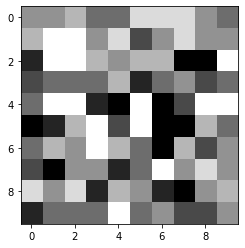

In [100]:

# Let us create a random matrix and threshold it
np.random.seed(333) # defining a seed
# random image with 10x10 size
f = np.random.randint(0,8, [10,10])
plt.imshow(f,cmap="gray")

<BarContainer object of 8 artists>

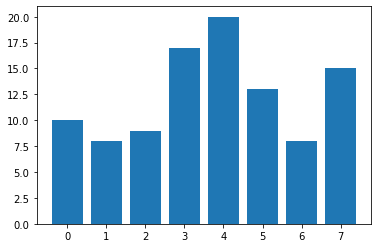

In [101]:
hist,_ = np.histogram(f, bins=8, range=(0,8))
plt.bar(np.arange(0,8), hist)

A function to threshold a given image can be written as follows. Note that, when applying different threshold values, we change the amount of black and white pixels on the resulting image. A lower threshold allows more white (value 1) pixels.

In [102]:
def thresholding(f, L):
    # create a new image with zeros
    f_tr = np.ones(f.shape).astype(np.uint8)
    # setting to 0 the pixels below the threshold
    f_tr[np.where(f < L)] = 0
    return f_tr  

<BarContainer object of 8 artists>

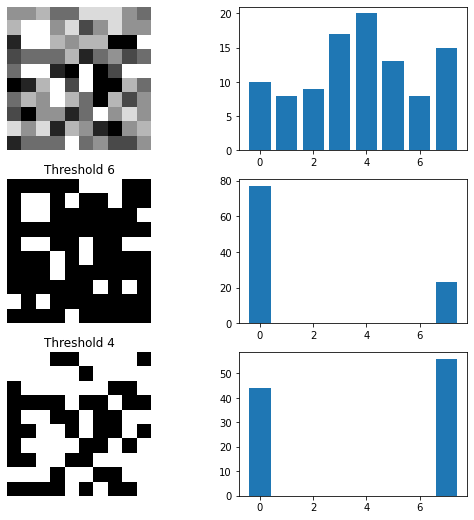

In [103]:
f_thres6 = thresholding(f, 6)
hist_t6,_ = np.histogram(f_thres6*7, bins=8, range=(0,8))

f_thres4 = thresholding(f, 4)
hist_t4,_ = np.histogram(f_thres4*7, bins=8, range=(0,8))

plt.figure(figsize=(9,9))
plt.subplot(321); plt.imshow(f,cmap="gray"); plt.axis('off')
plt.subplot(322); plt.bar(np.arange(0,8), hist)
plt.subplot(323); plt.imshow(f_thres6,cmap="gray"); plt.axis('off'); plt.title('Threshold 6')
plt.subplot(324); plt.bar(np.arange(0,8), hist_t6)
plt.subplot(325); plt.imshow(f_thres4,cmap="gray"); plt.axis('off'); plt.title('Threshold 4')
plt.subplot(326); plt.bar(np.arange(0,8), hist_t4) 

Let us use the same function but now for a real image. The mean intensity value is used as threshold in this example.

<BarContainer object of 256 artists>

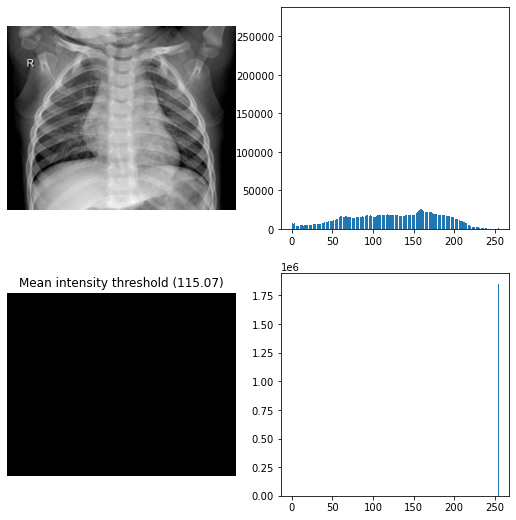

In [104]:
img = imageio.imread("img001.jpg")

mean_v = np.mean(img)
img_t = thresholding(img, mean_v)

hist_img,_ = np.histogram(img, bins=256, range=(0,256))
hist_t,_ = np.histogram(img_t*255, bins=256, range=(0,256))

plt.figure(figsize=(9,9))
plt.subplot(221); plt.imshow(img,cmap="gray"); plt.axis('off')
plt.subplot(222); plt.bar(np.arange(0,256), hist_img)
plt.subplot(223); plt.imshow(img_t, cmap="gray"); plt.axis('off'); plt.title('Mean intensity threshold (%.2f)' % (mean_v))
plt.subplot(224); plt.bar(np.arange(0,256), hist_t)

In [105]:
def otsu_threshold(img, max_L):
    
    M = np.product(img.shape)
    min_var = []
    hist_t,_ = np.histogram(img, bins=256, range=(0,256))
    
    img_t = thresholding(img, 0)
    
    for L in np.arange(1, max_L):
        img_ti = thresholding(img, L)
        # computing weights
        w_a = np.sum(hist_t[:L])/float(M)
        w_b = np.sum(hist_t[L:])/float(M)
        # computing variances
        sig_a = np.var(img[np.where(img_ti == 0)])
        sig_b = np.var(img[np.where(img_ti == 1)])
        
        min_var = min_var + [w_a*sig_a + w_b*sig_b]
        
    img_t = thresholding(img, np.argmin(min_var))
    
    return img_t, np.argmin(min_var)

<BarContainer object of 256 artists>

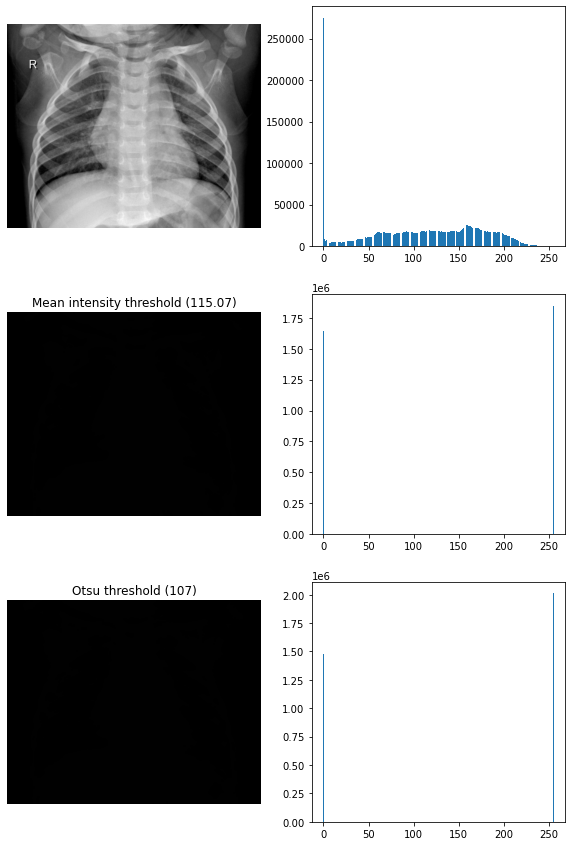

In [106]:
img_o, OL = otsu_threshold(img, 255)

hist_o,_ = np.histogram(img_o*255, bins=256, range=(0,256))

plt.figure(figsize=(10,15))
plt.subplot(321); plt.imshow(img,cmap="gray"); plt.axis('off')
plt.subplot(322); plt.bar(np.arange(0,256), hist_img)
plt.subplot(323); plt.imshow(img_t, cmap="gray"); plt.axis('off'); plt.title('Mean intensity threshold (%.2f)' % (mean_v))
plt.subplot(324); plt.bar(np.arange(0,256), hist_t)
plt.subplot(325); plt.imshow(img_o, cmap="gray"); plt.axis('off'); plt.title('Otsu threshold (%d)' % (OL))
plt.subplot(326); plt.bar(np.arange(0,256), hist_o)

In [107]:
#PSNR 
def PSNR(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
  
def main():
     original = cv2.imread("ref_img.jpg")
     denoised = cv2.imread("threshold_segmented_img.jpg", 1)
     value = PSNR(original, denoised)
     print(f"PSNR value is {value} dB")
       
if __name__ == "__main__":
    main()

PSNR value is 27.767417909118887 dB


In [108]:
#MSE
original = cv2.imread("original_image.jpg")
denoised = cv2.imread("denoised_image.jpg", 1)
MSE = np.mean((original - denoised) ** 2)
print("MSE value is", MSE)

MSE value is 6.254236563406491


![](table1.png)
## So K-means Clustering will be adopted for our model

---------------------------

### **Image Restoration by Split Bregman Methods and Frame Based Image Restoration(SBMR)**

In [109]:
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku

In [110]:
def show(img):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(img, cmap=plt.cm.gray)
    ax.set_axis_off()
    plt.show()

In [111]:
image1=cv2.imread("img001.jpg")
image2=cv2.imread("img002.jpg")
image3=cv2.imread("img003.jpg")
image=[image1,image2,image3]
reshaped=[0,0,0]

C:\Users\Jagadeesh\anaconda3\envs\dip_env\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  


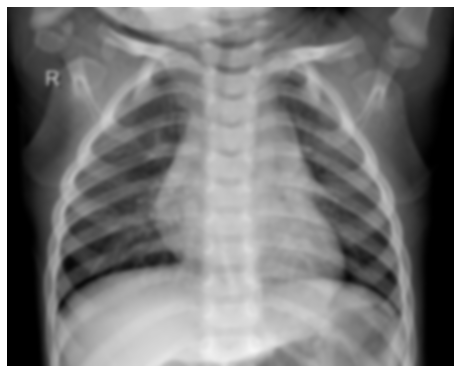

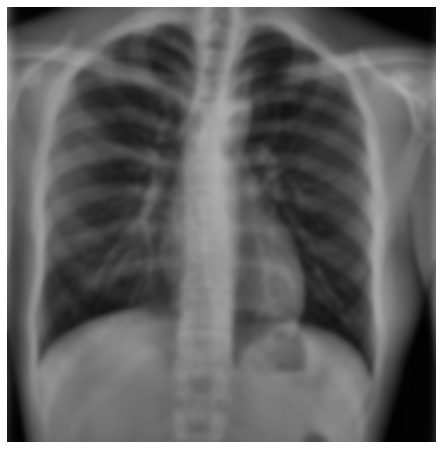

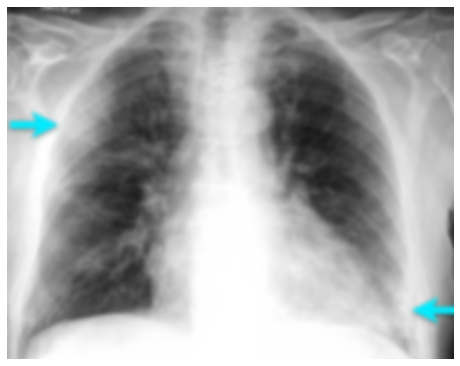

In [112]:
def img(img):
    show(skif.gaussian(img, 5.))

img(image1)
img(image2)
img(image3)

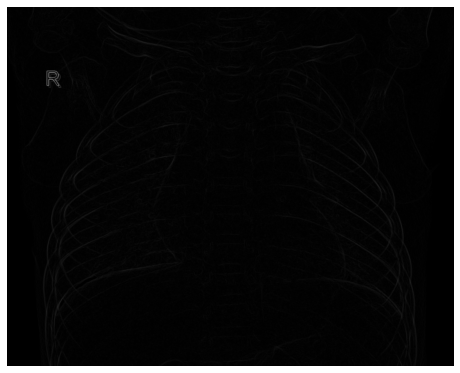

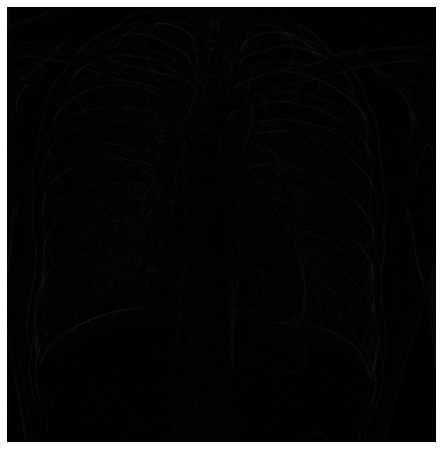

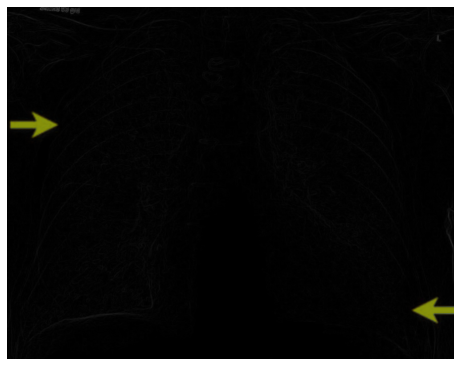

In [113]:
def img(img):
    sobimg = skif.sobel(img)
    show(sobimg)

img(image1)
img(image2)
img(image3)

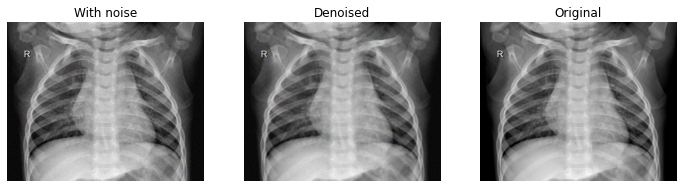

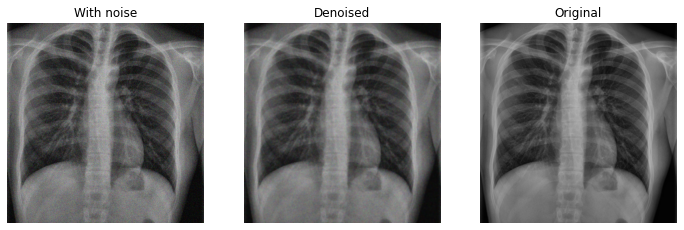

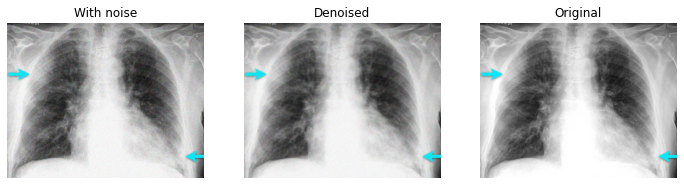

In [114]:
def img(img):
    img_n = sku.random_noise(img)
    img_r = skimage.restoration.denoise_tv_bregman(img_n, 5.)
    fig, (ax1, ax2, ax3) = plt.subplots(
        1, 3, figsize=(12, 8))

    ax1.imshow(img_n)
    ax1.set_title('With noise')
    ax1.set_axis_off()

    ax2.imshow(img_r)
    ax2.set_title('Denoised')
    ax2.set_axis_off()

    ax3.imshow(img)
    ax3.set_title('Original')
    ax3.set_axis_off()
img(image1)
img(image2)
img(image3)

In [115]:
#PSNR 
def PSNR(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
  
def main():
     original = cv2.imread("original_image.jpg")
     denoised = cv2.imread("denoised_image.jpg", 1)
     value = PSNR(original, denoised)
     print(f"PSNR value is {value} dB")
       
if __name__ == "__main__":
    main()

PSNR value is 40.16906056676214 dB


In [116]:
#MSE
original = cv2.imread("original_image.jpg")
denoised = cv2.imread("denoised_image.jpg", 1)
MSE = np.mean((original - denoised) ** 2)
print("MSE value is", MSE)

MSE value is 6.254236563406491


## Medical Image Restoration with Different Types of Noise
*Ma. Guadalupe Sánchez, Vicente Vidal, Gumersindo Verdú, Patricia Mayo and Francisco Rodenas*

![](table2.png)

[http://ieeexplore.ieee.org.egateway.vit.ac.in/document/6346937](http://ieeexplore.ieee.org.egateway.vit.ac.in/document/6346937)] 

In [117]:
import pickle

a = {'Image Segmentation by K-means Clustering Algorithm':
    'Image Restoration by Split Bregman Methods and Frame Based Image Restoration(SBMR)'}

with open('image_process.pickle', 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('image_process.pickle', 'rb') as handle:
    b = pickle.load(handle)

print("Saved Successfully...")

Saved Successfully...


-------------------------